In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
import sklearn.mixture as mix 

Testing a small universe of the 10Y Treasury, an Oil ETF, and Tech ETF 

In [5]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 10

Create the subset of assets.

In [6]:
m6 = pd.read_csv('./data/assets_m6.csv')
m6_subset = pd.DataFrame()

for sym in assetlist: 
    m6_subset[sym] = m6[m6['symbol'] == sym]['price'].values

1st-order differencing of the rolling average expectation for each asset. 

In [7]:
m6_subset = m6_subset.apply(np.log).rolling(10).mean().diff().dropna()
print(m6_subset)

          IEF       GSG       IXN
10  -0.001878  0.004799 -0.004710
11  -0.002042  0.002259 -0.002013
12  -0.002037  0.001592 -0.002763
13  -0.001077  0.001889 -0.002938
14   0.000018  0.000861 -0.004356
..        ...       ...       ...
194  0.000290  0.005585 -0.001463
195 -0.000286  0.003399 -0.002283
196 -0.000453 -0.001500 -0.002852
197  0.001061 -0.000679  0.006195
198  0.001369  0.001982  0.004565

[189 rows x 3 columns]


Instantiate a non-parametric clustering model using the dirichlet process. 

In [8]:
dpgmm_model = mix.BayesianGaussianMixture(n_components=num_components, weight_concentration_prior_type='dirichlet_process').fit(m6_subset)

In [9]:
states = dpgmm_model.predict(m6_subset)
state_counts = np.zeros(num_components)

for M in states:
  state_counts[M] += 1 

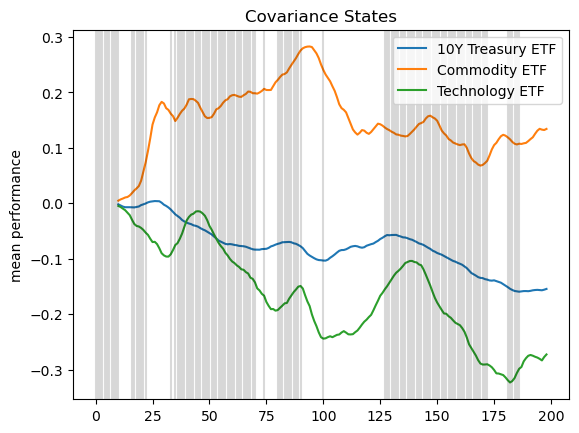

In [10]:
fig,ax = plt.subplots()

sns.lineplot(data=m6_subset['IEF'].cumsum(), ax=ax, label='10Y Treasury ETF')
sns.lineplot(data=m6_subset['GSG'].cumsum(), ax=ax, label='Commodity ETF')
sns.lineplot(data=m6_subset['IXN'].cumsum(), ax=ax, label='Technology ETF')

for M in range(len(states)): 
  if states[M] == np.argmax(state_counts):
    ax.axvline(M, color='black', alpha=0.15)

ax.set_title('Covariance States')
ax.set_ylabel('mean performance')
plt.show()

In [11]:
print(dpgmm_model.means_)

[[-8.20960566e-04  7.22242345e-04 -1.44531897e-03]
 [-8.20939163e-04  7.22175204e-04 -1.44530431e-03]
 [-8.21022370e-04  7.22441054e-04 -1.44535834e-03]
 [-1.89952218e-05 -1.11915737e-03  4.50671077e-03]
 [-1.34324956e-03  8.03611389e-04 -4.45964523e-03]
 [-8.20271900e-04  7.20082915e-04 -1.44484895e-03]
 [ 7.94985656e-04  1.53145231e-02 -4.32350800e-03]
 [-8.17131939e-04  7.10229420e-04 -1.44268635e-03]
 [-8.17131827e-04  7.10229069e-04 -1.44268627e-03]
 [-8.17131827e-04  7.10229069e-04 -1.44268627e-03]]
